# Task 1
Basic imports and read in the dataset

In [5]:
import numpy as np
import pandas as pd
import math

In [6]:
# import the mushroom dataset
mush = pd.read_csv('mushrooms.csv')

# Task 2
Gather some basic sense of the data

In [7]:
mush.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

In [8]:
mush.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [9]:
mush.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

# Task 3  
Create functions for Entropy and Information Gain calculations.
These will then be used to determine the best splits for a tree-based classification model

<h3> Entropy </h3>
&nbsp; Entropy is a measure of disorder that can be applied to a set.
Technically, Entropy is defined as: 
<center><b>entropy</b> = -p<sub>1</sub>log(p<sub>1</sub>) - p<sub>2</sub>log(p<sub>2</sub>) - ... - p<sub>n</sub>log(p<sub>n</sub>)  </center>
<Br>
<dl>
<dt> n : the number of properties </dt>

<dt>p<sub>i</sub> : the probability of property i within the set.</dt>
    <dd> &nbsp; Ranges from p<sub>i</sub> = 1 (all members of a set have the same property, specifically property <i>i</i>) to p<sub>i</sub> = 0 (no members of the set have property <i>i</i>)  </dd>

</dl>
    

In [10]:
def computeEntropy(series):
    numrows = float(len(series))
    entropy = 0
    property_counts = series.value_counts()
    property_names = series.value_counts().index.tolist()
    if sum(property_counts) != numrows:
        return 'sums do not match up'
    elif len(property_counts) != len(property_names):
        return 'something doesnt match up'
    k = len(property_counts)
    for prop in property_counts:
        p_i = float(prop)/numrows
        if p_i != 1:
#         print p_i
            entropy -= p_i*(math.log(p_i,k))
    return entropy
        
        

In [11]:
computeEntropy(mush['ring-number'])

0.2654196204356388

Make sure this function works properly:

In [12]:
series = mush['cap-shape']
len(series)

8124

In [13]:
series.value_counts()

x    3656
f    3152
k     828
b     452
s      32
c       4
Name: cap-shape, dtype: int64

In [14]:
p_1 = float(3656)/float(8124)
p_2 = float(3152)/float(8124)
p_3 = float(828)/float(8124)
p_4 = float(452)/float(8124)
p_5 = float(32)/float(8124)
p_6 = float(4)/float(8124)
entropy = (p_1*math.log(p_1,6))+(p_2*math.log(p_2,6))+(p_3*math.log(p_3,6))+(p_4*math.log(p_4,6))
+(p_5*math.log(p_5,6)) +(p_6*math.log(p_6,6))
print "cap-shape entropy is:"
print -entropy
print p_1+p_2+p_3+p_4+p_5+p_6

cap-shape entropy is:
0.625159775841
1.0


In [15]:
mush['ring-number'].value_counts()

o    7488
t     600
n      36
Name: ring-number, dtype: int64

<h2>Information Gain</h2>
&nbsp; Information Gain measures the increase (or decreasue) in entropy of a set compared to its parent. Ex) how much would our knowledge increase, if we split our parent set on a certain attribute.

Technically, Information Gain of a split is:
<center> <i><b>IG(parent,children)</b> = entropy(parent) -
[ p(c<sub>1</sub>) x entropy(c<sub>1</sub>) + p(c<sub>2</sub>) x entropy(c<sub>2</sub>) + ... ] </i>
</center>
<br>
<dl>
<dt>c<sub>i</sub> : represents the <i>i</i>th child set out of <i>n</i> total child sets</dt>
<dt> p(c<sub>i</sub>) : the proportion of instances belonging to child set <i>i</i></dt>
</dl>

note that the entropy of each child set is weighted by the proportion of instances belonging to that set

In [16]:
def informationGain(dataset, split_feature, target):
    cols = []
    for col in dataset.columns:
        if col != target:
            cols.append(col)
    if split_feature not in cols:
        return 'the feature to be split on is not in the feature set'
    entropy_parent = computeEntropy(dataset[target])
    prop_counts = dataset[split_feature].value_counts()
    prop_names = dataset[split_feature].value_counts().index.tolist()
    numrows = float(len(dataset[split_feature]))
    for i in range(len(prop_names)):
        df = dataset.loc[dataset[split_feature] == prop_names[i]]
        part = computeEntropy(df[target])
        part = part * (float(df.shape[0])/numrows)
        entropy_parent -= part
    return entropy_parent
    
    
    


In [17]:
informationGain(mush, 'ring-number', 'class')

0.03845266924309059

Great, now lets loop through all columns and see which gives the best information gain. All IG's are between 0 and 1 with odor as the greatest, as expected.

In [18]:
for col in mush.columns:
    if col != 'class':
        print col, informationGain(mush, col, 'class')

cap-shape 0.0487967019354
cap-surface 0.0285902327738
cap-color 0.0360492829762
bruises 0.192379485761
odor 0.906074977384
gill-attachment 0.0141650272506
gill-spacing 0.100883183997
gill-size 0.230154375148
gill-color 0.416977523416
stalk-shape 0.00751677256966
stalk-root 0.134817637627
stalk-surface-above-ring 0.284725599218
stalk-surface-below-ring 0.271894473393
stalk-color-above-ring 0.253845173462
stalk-color-below-ring 0.241415566528
veil-type 0.0
veil-color 0.0238170161209
ring-number 0.0384526692431
ring-type 0.318021510794
spore-print-color 0.480704917685
population 0.201958019067
habitat 0.156833604605


In [19]:
mush.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [27]:
mush[['class']].head()

,class
0,p
1,e
2,e
3,p
4,e


<b>cool, thats it on this subject from the book so imma throw a decision tree in here and then try to visualize it</b>

In [23]:
from sklearn.model_selection import train_test_split
from sklearn import tree

In [29]:
X = mush.drop('class', axis=1)
y = mush[['class']]

In [41]:
#must convert y from categorical to numerical for the classifier
mapping = {'p':0, 'e':1}
#y = y.replace({'class':mapping})

In [46]:
X = pd.get_dummies(X, drop_first=True)

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25)

In [49]:
clf = tree.DecisionTreeClassifier()

In [51]:
clf = clf.fit(X_train,y_train)

In [53]:
import graphviz
dot_data = tree.export_graphviz(clf,out_file=None)
graph = graphviz.Source(dot_data)
graph.render("mushroom")

'mushroom.pdf'

In [56]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=X.columns,  
                         class_names='isEdible',  
                         filled=True, rounded=True,  
                         special_characters=True) 

In [57]:
graph = graphviz.Source(dot_data)
graph.render("mushroom2")

'mushroom2.pdf'

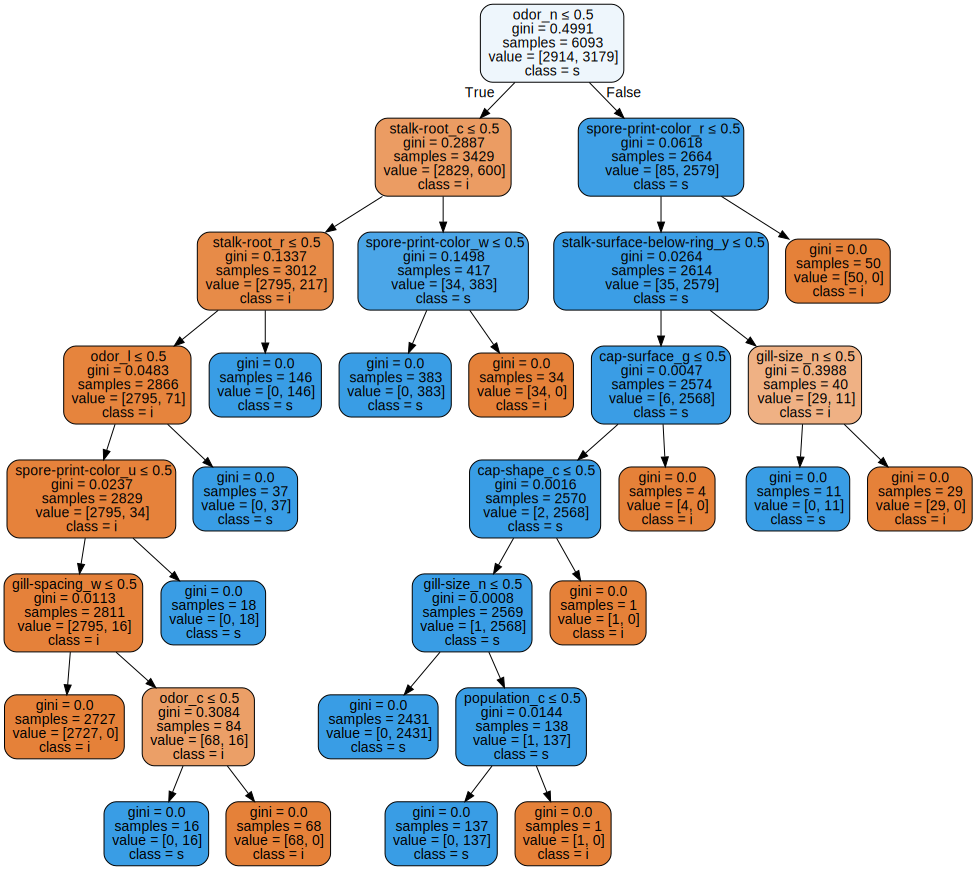

In [58]:
graph

<h3> Now will do a prediction or 2</h3>

In [63]:
clf.predict(X_test)

array([0, 0, 0, ..., 1, 1, 1])

In [64]:
clf.score(X_test, y_test)

1.0